In [3]:
# Load the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import dataset
df = pd.read_table('Data/Charitable Donations/cup98LRN.txt', sep = ',', low_memory = False, na_values = ' ')

# Dataset Overview
* This is the data set used for The Second International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-98 The Fourth International Conference on Knowledge Discovery and Data Mining. 
* The dataset used in this project is the Training set used in the competition. It includes:
    * 95412 rows, 481 columns
    * Each record has a unique identifier, personal attributes, as well as donation history.
    * Each record has two target/dependent variables: TARGET_B and TARGET_D. TARGET_B is a binary variable indicating whether or not the record responded to the promotion of interest ("97NK" mailing) while TARGET_D contains the donation amount (dollar) and is only observed for those that responded to the promotion.
* Only the code used to generate graphs are shown below. The code used for data wrangling has been removed.  


# Exploratory Data Analysis

### 1. Highly Imbalanced Data - Response Rate Only 5%

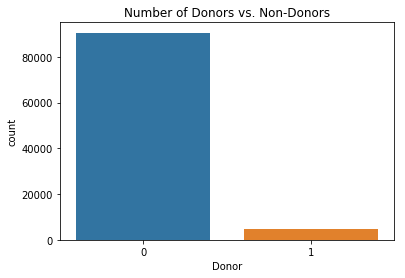

In [10]:
sns.countplot(data = df, x = 'TARGET_B')
plt.xlabel('Donor')
plt.title('Number of Donors vs. Non-Donors')
plt.show()


### 2. One Fifth of the Features have More than 30% Missing Values. 
    * Feature Elimination and Selection Will be Crucial

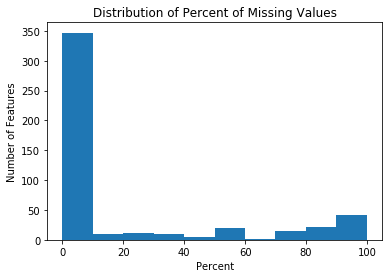

In [15]:
# Plot the distribution of percentage of missing values by feature
plt.hist(x = missing_table['Percent of Missing Values'])
plt.title('Distribution of Percent of Missing Values')
plt.ylabel('Number of Features')
plt.xlabel('Percent')
plt.show()

### 3. No Big Differences in Demographic Attributes and Recent Giving History Between Those Who Responded to the 97NK Promotion and Those Who Did Not

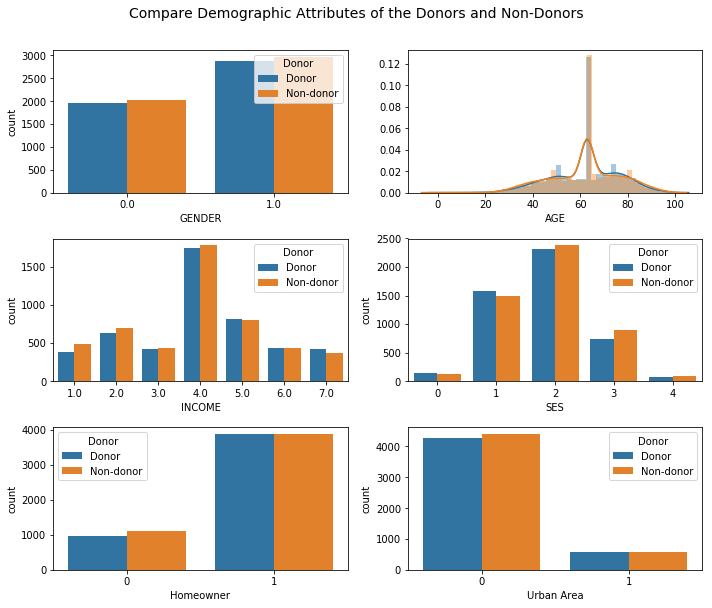

In [85]:
# Create plots
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10,8))

sns.countplot(data = df_dummy, x = 'GENDER', hue = 'Donor', ax = ax1)

sns.distplot(df_dummy.loc[df_dummy.TARGET_B == 1]['AGE'], ax = ax2)
sns.distplot(df_dummy.loc[df_dummy.TARGET_B == 0]['AGE'], ax = ax2)

sns.countplot(data = df_dummy, x = 'INCOME', hue = 'Donor', ax = ax3)

sns.countplot(data = df_dummy, x = 'SES', hue = 'Donor', ax = ax4)

sns.countplot(data = df_dummy, x = 'HOMEOWNR_H', hue = 'Donor', ax = ax5)
ax5.set_xlabel('Homeowner')

sns.countplot(data = df_dummy, x = 'URBAN_U', hue = 'Donor', ax = ax6)
ax6.set_xlabel('Urban Area')

plt.suptitle('Compare Demographic Attributes of the Donors and Non-Donors', y = 1.05, fontsize = 14)
f.tight_layout()
plt.show()

The above charts show that there are no big differences in characteristics of donors (those who responded to the 97NK promotion), and non-donors (those who did not)

### 4. Understand Distribution of Donation Amount

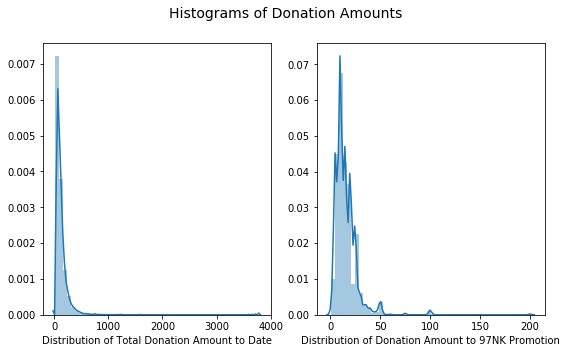

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,5))

sns.distplot(df_dummy.RAMNTALL, ax = ax1)
ax1.set_xlabel('Distribution of Total Donation Amount to Date')

sns.distplot(df_dummy.loc[df_dummy.TARGET_B == 1].TARGET_D, ax = ax2)
ax2.set_xlabel('Distribution of Donation Amount to 97NK Promotion')

plt.suptitle('Histograms of Donation Amounts', fontsize = 14)
plt.show()

* Most people in the dataset gave between \$0 and \$500 in total amount of donations to date.
* Most people who responded to the 97NK promotion donated less than $50.

### 5. Understand Correlations Between Donation Amount and Other Attributes (Age, Income)

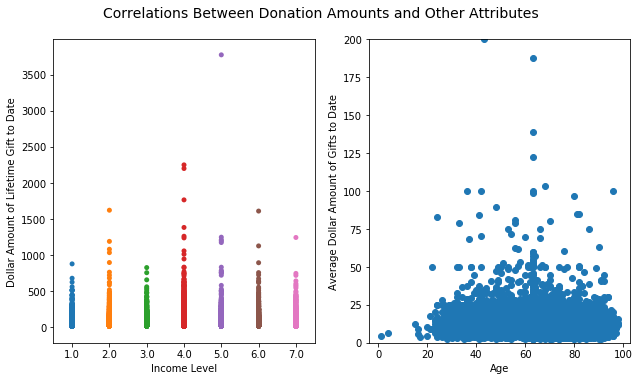

In [101]:
f = plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
sns.stripplot(x = 'INCOME', y = 'RAMNTALL', data =df_dummy)
plt.xlabel('Income Level')
plt.ylabel('Dollar Amount of Lifetime Gift to Date')

plt.subplot(1,2,2)
plt.scatter(x = df_dummy.AGE, y = df_dummy.AVGGIFT)
plt.xlabel('Age')
plt.ylabel('Average Dollar Amount of Gifts to Date')
plt.ylim(0,200)

plt.suptitle('Correlations Between Donation Amounts and Other Attributes', fontsize = 14, y = 1.05)
f.tight_layout()
plt.show()

There is no strong correlation between Donation Amount and income as well as age. 

### 6. No Major Differences in Giving History Between Donors and Non-Donors of the 97NK Promotion

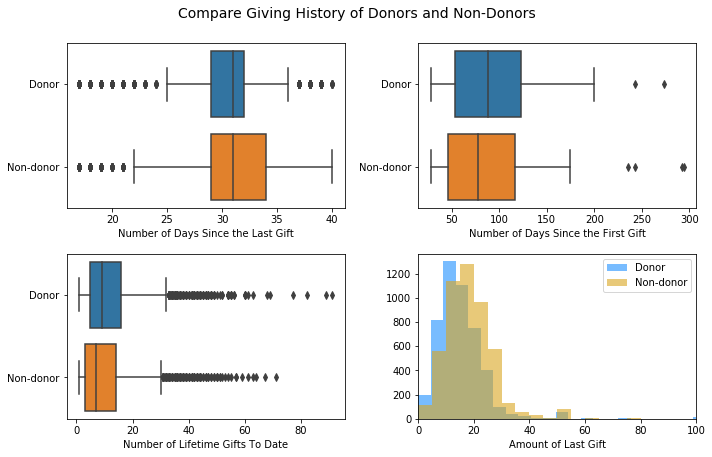

In [80]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.boxplot(data = df_dummy, x = 'SINCE_LASTDATE', y = 'Donor')
plt.xlabel('Number of Days Since the Last Gift')
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(data = df_dummy, x = 'SINCE_FISTDATE', y = 'Donor')
plt.xlabel('Number of Days Since the First Gift')
plt.ylabel('')


plt.subplot(2,2,3)
sns.boxplot(data = df_dummy, x = 'NGIFTALL', y = 'Donor')
plt.ylabel('')
plt.xlabel('Number of Lifetime Gifts To Date')

plt.subplot(2,2,4)
plt.hist(df_dummy.loc[df_dummy.TARGET_B == 1].LASTGIFT,  label = 'Donor', color = 'dodgerblue', bins = 100, alpha = 0.6)
plt.hist(df_dummy.loc[df_dummy.TARGET_B == 0].LASTGIFT,  label = 'Non-donor', color = 'goldenrod', bins = 100, alpha = 0.6)
plt.legend(loc = 'upper right')
plt.xlabel('Amount of Last Gift')
plt.ylabel('')
plt.xlim(0,100)

plt.suptitle('Compare Giving History of Donors and Non-Donors', y = 1.05, fontsize = 14)
#ax2.set_xlim(0, 100)
fig.tight_layout()
plt.show()


* The number of days since the last gift are slightly less for donors than for non-donors. In other words, those who donated to the 97NK promotion seem to be those who donated more recently.
* The number of days since the first gift are slightly more for donors than for non-donors. In other words, thoe who donated to the 97NK promotion seem to be those who had been donating for a longer period of time.
* There are no big differences in the total number of gifts to date between donors and non-donors.
* The amount of the last gift of the donors seems slighlty less than that of non-donors, but no big difference.

### 7. Some of the Most Important Features Are Highly Correlated.

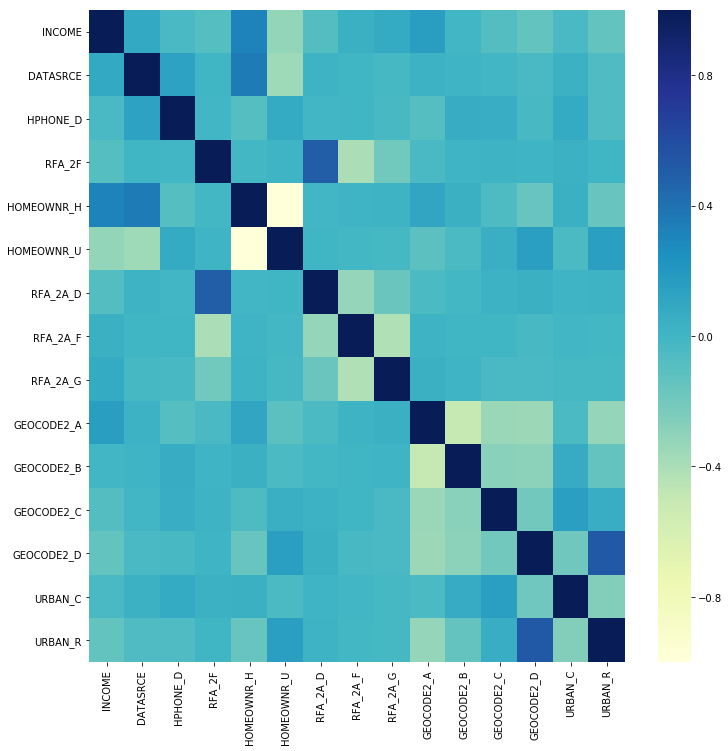

In [121]:
# Check correlation of the selected variables
plt.figure(figsize = (12, 12))
sns.heatmap(X[rfe_selected_var].corr(), cmap="YlGnBu")
plt.show()

After doing some feature selection (to prepare for modeling), 15 features remain. Among them, some seem to be highly correlated:
    - RFA_2A_D and RFA_2F
    - URBAN_R and GEOCODE2_D
    - GEOCODE2_A and GEOCODE2_B
    - HOMEOWNR_U and HOMEOWNR_H
Will drop RFA_2A_D, GEOCODE2_D, GEOCODE2_B, HOMEOWNR_U. Keep the rest